
# import the dataset and seperate it into input and output datasets (x, y)


In [1]:
import numpy as np
import pandas as pd

In [2]:
# choose scenario to run
while True:
    S = input('choose a scenario [1, 2, 3]:')
    if S == '1':
        TrainingData = 'scenarios\Scenario A\Training-a1-a3.csv'
        TestingData  = 'scenarios\Scenario A\Testing-a1-a3.csv'
        break
    elif S == '2':
        TrainingData = 'scenarios\Scenario B\Training-a1.csv'
        TestingData  = 'scenarios\Scenario B\Testing-a2-a4.csv'
        break
    elif S == '3':
        TrainingData = 'scenarios\Scenario C\Training-a1-a2.csv'
        TestingData  = 'scenarios\Scenario C\Testing-a1-a2-a3.csv'
        break

choose a scenario [1, 2, 3]:3


In [3]:
# Read the train dataset
train_dataset = pd.read_csv(TrainingData, header=None)

# select all column except the last 2, the .values at the end of the slice changes the Pandas DataFrame to a NumPy array.
train_X = train_dataset.iloc [:, 0:-2].values
# select the second last column only (contain the labels: normal and attack)
label_column = train_dataset.iloc [:, -2].values
train_y = []

for i in range(len( label_column )):
    if label_column[i] == 'normal':
        train_y.append (0)
    else:
        train_y.append (1)
        
# Convert y to numpy array
train_y = np.array(train_y)
train_X.shape

(124926, 41)

In [4]:
# Read the test dataset
test_dataset = pd.read_csv(TestingData, header=None)

# Select all column except the last 2, the .values at the end of the slice changes the Pandas DataFrame to a NumPy array.
test_X = test_dataset.iloc [:, 0:-2].values

# select the second last column only (contain the labels: normal and attack)
test_label_column = test_dataset.iloc [:, -2].values
test_y = []

for i in range(len(test_label_column)):
    if test_label_column[i] == 'normal':
        test_y.append(0)
    else:
        test_y.append(1)

# Convert y to numpy array
test_y = np.array(test_y)

test_X.shape

(19659, 41)

## transform column 1,2, and 3 from strings to float

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer (
    [('one hot encoder', OneHotEncoder(), [1 ,2 ,3])],
    # Leave the rest untouched
    remainder ='passthrough'
)

X_train = np.array(ct.fit_transform(train_X), dtype=float)
# X_test  = np.array(ct.fit_transform(test_X), dtype=float)
X_test  = np.array(ct.transform(test_X), dtype=float)

In [6]:
print('training size: ',X_train.shape, ' - testing size:',X_test.shape)
print('training size: ',train_y.shape, ' - testing size:',test_y.shape)

training size:  (124926, 122)  - testing size: (19659, 122)
training size:  (124926,)  - testing size: (19659,)


## scalling (transforming) the dataset to make it fit for ML model

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()

# Scaling to the range [0,1]
X_train = sc.fit_transform (X_train)
X_test  = sc.fit_transform (X_test)

 # Building FNN Training Module

In [8]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

# Adding the input layer (6 nodes)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = len(X_train[0])))

# Adding the second hidden layer (6 nodes)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer (1 node) ,
# sigmoid on the output layer is to ensure the network output is between 0 and 1
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# run training with batch size = 10 and epochs = 10  will be performed
classifierHistory = classifier .fit(X_train , train_y , batch_size = 10, epochs = 10)


Epoch 1/10
12493/12493 [==============================] - 18s 1ms/step - loss: 0.0515 - accuracy: 0.9816
Epoch 2/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0212 - accuracy: 0.9921
Epoch 3/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 4/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0169 - accuracy: 0.9949
Epoch 5/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 6/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 7/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 8/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0113 - accuracy: 0.9967
Epoch 9/10
12493/12493 [==============================] - 17s 1ms/step - loss: 0.0108 - accuracy: 0.9967
Epoch 10/10
12493/12493 [==============================

In [10]:
loss, accuracy = classifier.evaluate(X_train , train_y)
print('Print the loss and the accuracy of the model on the dataset')
print('Loss [0,1]: %.4f' % (loss), 'Accuracy [0,1]: %.4f' % (accuracy))

3904/3904 [==============================] - 5s 1ms/step - loss: 0.0100 - accuracy: 0.9974
Print the loss and the accuracy of the model on the dataset
Loss [0,1]: 0.0100 Accuracy [0,1]: 0.9974


#  Evaluate FNN Training Results

In [11]:
# using the trained model to predict the Test dataset results
y_pred = classifier.predict(X_test)

# y_pred = 0 if the prediction is =< 0.9 
# y_pred = 1 if the prediction is > 0.9
y_pred = ( y_pred > 0.9)

615/615 [==============================] - 1s 967us/step


In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix (test_y , y_pred)
print('Print the Confusion Matrix:')
print(cm)

# TN FP
# FN TP

Print the Confusion Matrix:
[[8948  763]
 [1755 8193]]


# Visualize FNN Training and Testing Results

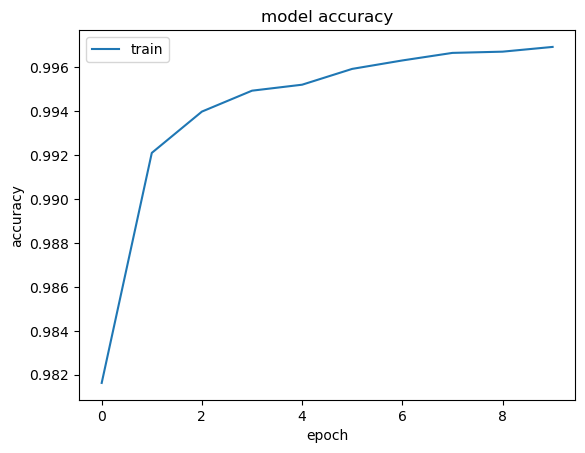

In [13]:
import matplotlib.pyplot as plt

# Note that Keras 2.2.4 recognize 'acc' and 2.3.1 recognize 'accuracy'
# You can use the command python −c 'import keras; print(keras.__version__)' on MAC or Linux to check Keras 'version'
plt.plot(classifierHistory.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend (['train'], loc='upper left')
plt.savefig('accuracy sample.png')
plt.show ()


Plot the loss


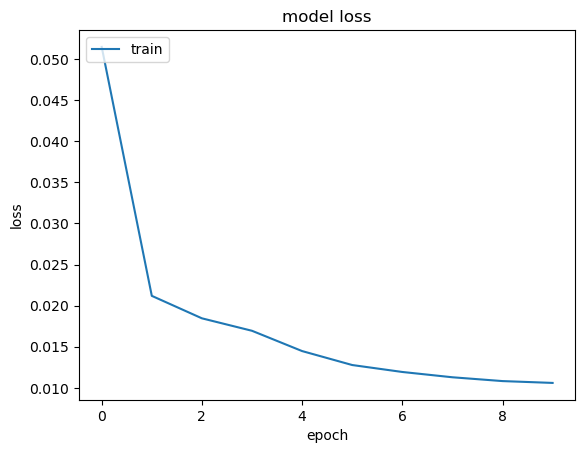

In [14]:
print('Plot the loss')
plt.plot(classifierHistory.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['train'], loc='upper left')
plt.savefig('loss sample.png')
plt.show ()